In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Восстановление спроса

Алексей Романенко, alexromsput@gmail.com, 

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline

# Описание данных

In [0]:
# Нужно быть предельно внимательным с форматами дат!
# data = pd.read_csv('./data/sales_4001.csv', sep=',', decimal='.')
data = pd.read_csv('/content/gdrive/My Drive/A Reinforcement Learning Approach for Inventory Optimization in Retail/DemandRestoring_v0/data/sales_4001.csv', sep=',', decimal='.')
data['Timestamp'] = pd.to_datetime(data[u'purchase_date'])
data = data.set_index(['Timestamp'], drop=True)
data.head()

,purchase_date,shop_id,product_id,price,quantity,price_after_discount
Timestamp,,,,,,
2013-01-02,2013-01-02,4001,4100024369,1480,1,1480.0
2013-01-02,2013-01-02,4001,4100024794,2807,1,2807.0
2013-01-02,2013-01-02,4001,4100028657,979,1,979.0
2013-01-02,2013-01-02,4001,4300000205,3319,1,3319.0
2013-01-02,2013-01-02,4001,4300007581,1899,1,1899.0


In [0]:
Products = pd.read_csv('/content/gdrive/My Drive/A Reinforcement Learning Approach for Inventory Optimization in Retail/DemandRestoring_v0/data/Products.csv', sep=';', decimal='.', low_memory=False)
# Products = pd.read_csv('./data/Products.csv', sep=';', decimal='.', low_memory=False)
Products.head()

,Материал,Наим товара,Уровень 1 (ТН новая),Уровень 2 (Категория),Выкладка (иерарх),Дизайн (иерарх),Материал изготов-я (иерарх),Подкатегория (иерарх),Проба (иерарх),Стиль (иерарх),Тип ношения (иерарх),Ценовой сегмент (иерарх),Коллекция код,Коллекция название,"Вес нетто, г","Вес брутто, г",Основная вставка,Цвет металла,Размер цепей браслетов,Размер колец подвесов Конго
0,4300019891,Кольцо родир. алм.гр. 15.0,ИФБК,CLASSIC CZ NS,(Не определен),УЗОРЫ,(Не определен),(Не определен),585,КЛАССИКА,КОЛЬЦО,СРЕДНЯЯ,NaN,(Не определен),"1,45","1,45",NaN,КРАСНЫЙ,0,15
1,4300019831,Кольцо родир. алм.гр. 16.0,ИФБК,CLASSIC CZ NS,(Не определен),ГЕОМЕТРИЯ,(Не определен),(Не определен),585,КЛАССИКА,КОЛЬЦО,СРЕДНЯЯ,NaN,(Не определен),"1,513","1,513",NaN,КРАСНЫЙ,0,16
2,4300019887,Кольцо родир. алм.гр. 16.0,ИФБК,CLASSIC CZ NS,(Не определен),УЗОРЫ,(Не определен),(Не определен),585,КЛАССИКА,КОЛЬЦО,СРЕДНЯЯ,NaN,(Не определен),"1,546","1,546",NaN,КРАСНЫЙ,0,16
3,4300019860,Кольцо родир. алм.гр. 17.0,ИФБК,CLASSIC CZ NS,(Не определен),ЛЕПЕСТ_ПЕТ,(Не определен),(Не определен),585,КЛАССИКА,КОЛЬЦО,СРЕДНЯЯ,NaN,(Не определен),"1,412","1,412",NaN,КРАСНЫЙ,0,17
4,4300019591,Кольцо родир. алм.гр. 17.0,ИФБК,CLASSIC CZ NS,(Не определен),ГЕОМЕТРИЯ,(Не определен),(Не определен),585,КЛАССИКА,КОЛЬЦО,ДОРОГАЯ,NaN,(Не определен),"1,71","1,71",NaN,КРАСНЫЙ,0,17


In [0]:
Products.groupby('Стиль (иерарх)')['Материал'].count()

Стиль (иерарх)
(Не определен)     22548
КЛАССИКА          105676
МОДА               12306
ТРЕНД                904
Name: Материал, dtype: int64

In [0]:
Products.groupby('Тип ношения (иерарх)')['Материал'].count()

Тип ношения (иерарх)
(Не определен)        10294
БРАСЛЕТ                7642
БРОШЬ                     3
БУЛАВКА                   6
ЗАЖИМЫ                   82
ЗАКОЛКА                   2
ЗАКОЛКА Д/ГАЛСТУКА       11
ЗАПОНКИ                  56
ИКОНА                   826
КОЛЬЕ                  1127
КОЛЬЦО                69603
КРЕСТ                  1915
КСП                     400
НАБОР                   132
ОБОДОК                    1
ПЕЧАТКИ                2375
ПОДВЕС                12294
ПРОЧЕЕ                 1775
СЕРЬГИ                25275
СЕТЫ                     53
ЦБ                       70
ЦЕПЬ                   7492
Name: Материал, dtype: int64

In [0]:
Products.groupby('Ценовой сегмент (иерарх)')['Материал'].count()

Ценовой сегмент (иерарх)
(Не определен)      555
ДЕШЕВАЯ           30048
ДОРОГАЯ           55236
СРЕДНЯЯ           55595
Name: Материал, dtype: int64

## Данные в детализации Product|Location

In [0]:
data.groupby(['shop_id', 'product_id']).count().sort_values(['quantity'], ascending=False)[:12]

purchase_date  price  quantity  price_after_discount
shop_id product_id                                                      
4001    4900001067            325    325       325                   325
        4900001052            299    299       299                   299
        4900001050            276    276       276                   276
        4100064977            236    236       236                   236
        4100064978            211    211       211                   211
        4900001047            210    210       210                   210
        4900000357            190    190       190                   190
        4900001025            134    134       134                   134
        4900001029            118    118       118                   118
        4900002005            108    108       108                   108
        4900002021            107    107       107                   107
        4900001031             78     78        78                    78

In [0]:
data.index.unique()

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09',
               '2013-01-10', '2013-01-11',
               ...
               '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14',
               '2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18',
               '2016-10-19', '2016-10-20'],
              dtype='datetime64[ns]', name='Timestamp', length=1345, freq=None)

In [0]:
# Добавим наименование и ещё несколько атрибутов к таблице по продажам
# data = pd.(
    
data = data.reset_index().merge(Products[['Материал','Наим товара', 'Стиль (иерарх)','Тип ношения (иерарх)','Ценовой сегмент (иерарх)']], 
                         how='inner', left_on=['product_id'], right_on=['Материал']).set_index('Timestamp')
data.head()

,purchase_date,shop_id,product_id,price,quantity,price_after_discount,Материал,Наим товара,Стиль (иерарх),Тип ношения (иерарх),Ценовой сегмент (иерарх)
Timestamp,,,,,,,,,,,
2013-01-02,2013-01-02,4001,4100024369,1480,1,1480.0,4100024369,"Якорь 45,0; полн; d 0,30; 375 кр",(Не определен),ЦЕПЬ,ДЕШЕВАЯ
2014-12-24,2014-12-24,4001,4100024369,1824,1,1824.0,4100024369,"Якорь 45,0; полн; d 0,30; 375 кр",(Не определен),ЦЕПЬ,ДЕШЕВАЯ
2013-01-02,2013-01-02,4001,4100024794,2807,1,2807.0,4100024794,"Бисмарк 18,0; пуст; d 0,60; 375 кр",(Не определен),БРАСЛЕТ,СРЕДНЯЯ
2013-01-02,2013-01-02,4001,4100028657,979,1,979.0,4100028657,Крест с черн,(Не определен),КРЕСТ,СРЕДНЯЯ
2015-11-27,2015-11-27,4001,4100028657,500,1,500.0,4100028657,Крест с черн,(Не определен),КРЕСТ,СРЕДНЯЯ


In [0]:
# Конкретный отрезок временного ряда
idx = (data['shop_id']==4001)&(data['product_id']==4900001067)
data[idx].head()

,purchase_date,shop_id,product_id,price,quantity,price_after_discount,Материал,Наим товара,Стиль (иерарх),Тип ношения (иерарх),Ценовой сегмент (иерарх)
Timestamp,,,,,,,,,,,
2013-01-15,2013-01-15,4001,4900001067,149,5,745.0,4900001067,Футляр пенал узкий,(Не определен),ЦБ,(Не определен)
2013-01-15,2013-01-15,4001,4900001067,148,1,148.0,4900001067,Футляр пенал узкий,(Не определен),ЦБ,(Не определен)
2013-01-15,2013-01-15,4001,4900001067,149,1,149.0,4900001067,Футляр пенал узкий,(Не определен),ЦБ,(Не определен)
2013-01-16,2013-01-16,4001,4900001067,148,1,148.0,4900001067,Футляр пенал узкий,(Не определен),ЦБ,(Не определен)
2013-01-17,2013-01-17,4001,4900001067,149,1,149.0,4900001067,Футляр пенал узкий,(Не определен),ЦБ,(Не определен)


## Данные в детализации Product|Все Locations

In [0]:
ts_data = data.reset_index(level=0).reset_index(level=0).groupby(['Timestamp','product_id']).agg({'quantity' : np.sum,
        'price' : np.mean,
        'price_after_discount' :[np.min, np.max, np.mean]})

ts_data.head()

quantity   price price_after_discount                
                           sum    mean                 amin    amax    mean
Timestamp  product_id                                                      
2013-01-02 4100024369        1  1480.0               1480.0  1480.0  1480.0
           4100024794        1  2807.0               2807.0  2807.0  2807.0
           4100028657        1   979.0                979.0   979.0   979.0
           4300000205        1  3319.0               3319.0  3319.0  3319.0
           4300007581        1  1899.0               1899.0  1899.0  1899.0

In [0]:
# ts_data['quantity'].rename(columns={'sum':'quantity'}).reset_index(level=range(2)).head()
qty_ts = ts_data['quantity'].rename(columns={'sum':'quantity'}).reset_index().pivot(index = 'Timestamp', columns ='product_id', values = 'quantity')
qty_ts.head()

product_id,4100000013,4100000017,4100000137,4100000170,4100000171,4100000174,4100000175,4100000176,4100000177,4100000178,4100000179,4100000181,4100000182,4100000183,4100000184,4100000187,4100000188,4100000189,4100000190,4100000191,4100000192,4100000252,4100000253,4100000254,4100000255,4100000257,4100000258,4100000383,4100000385,4100000386,4100000387,4100000388,4100000391,4100000591,4100000616,4100001478,4100001479,4100001529,4100001618,4100001625,...,4900001072,4900001077,4900001079,4900001128,4900001129,4900001131,4900001133,4900001156,4900001157,4900001158,4900001160,4900001162,4900001163,4900001164,4900001165,4900001181,4900001204,4900001252,4900001257,4900001267,4900001295,4900001316,4900001877,4900001903,4900001933,4900001947,4900001953,4900001974,4900001976,4900001993,4900001995,4900001996,4900001997,4900002004,4900002005,4900002006,4900002021,4900002022,4900002085,4900005475
Timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


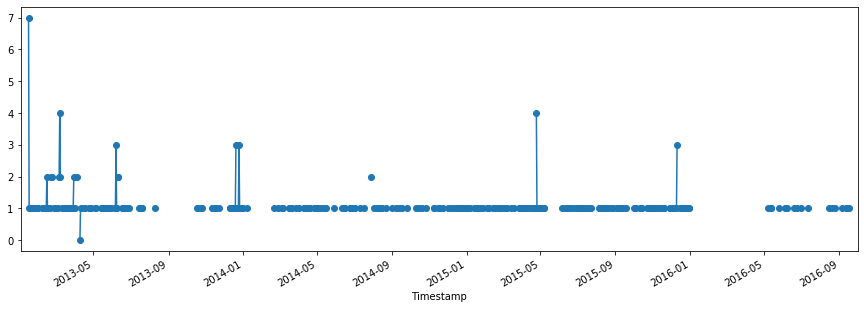

In [0]:
qty_ts[4900001067].loc['2013-01-02':'2016-10-01'].plot(figsize=(15,5), style='-o')

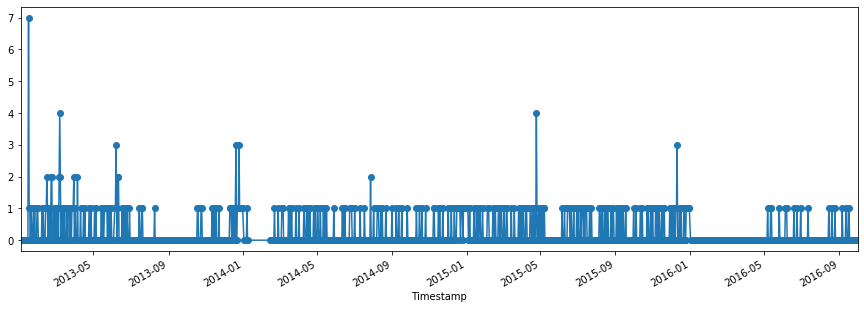

In [0]:
# заполним пропуски нулями (хотя это не всегда можно делать!!!)
qty_ts[4900001067].fillna(0).loc['2013-01-02':'2016-10-01'].plot(figsize=(15,5), style='-o')

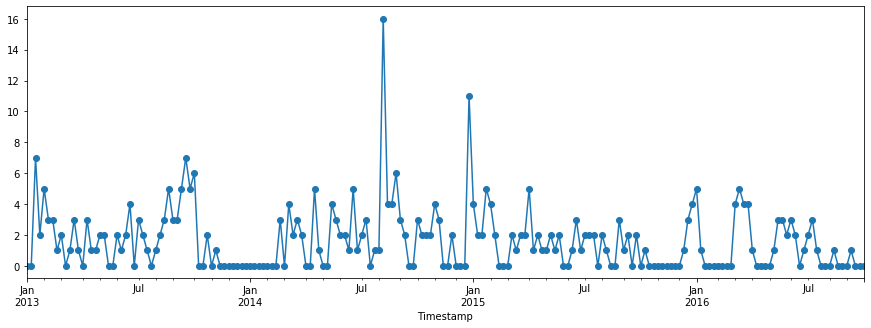

In [0]:
# сгруппируем понедельно
qty_ts[4900001052].fillna(0).loc['2013-01-02':'2016-10-01'].resample("W").sum().plot(figsize=(15,5), style='-o')

In [0]:
# Сгруппируем временные ряды по атрибутам
agg_column = 'Тип ношения (иерарх)'
ts_data = data.reset_index(level=0).reset_index().groupby(['Timestamp',agg_column]).agg({'quantity' : np.sum,
        'price' : np.mean,
        'price_after_discount' :[np.min, np.max, np.mean]})
qty_ts = ts_data['quantity'].rename(columns={'sum':'quantity'}).reset_index().pivot(index = 'Timestamp', 
                                                                                columns =agg_column, values = 'quantity')
qty_ts.head()

Тип ношения (иерарх),(Не определен),БРАСЛЕТ,ЗАЖИМЫ,ЗАПОНКИ,ИКОНА,КОЛЬЕ,КОЛЬЦО,КРЕСТ,КСП,ПЕЧАТКИ,ПОДВЕС,ПРОЧЕЕ,СЕРЬГИ,СЕТЫ,ЦБ,ЦЕПЬ
Timestamp,,,,,,,,,,,,,,,,
2013-01-02,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0
2013-01-03,1.0,4.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,3.0,1.0,NaN,3.0,NaN,NaN,6.0
2013-01-04,3.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,5.0
2013-01-05,NaN,5.0,NaN,NaN,NaN,NaN,6.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,2.0
2013-01-06,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,NaN,4.0,NaN,NaN,6.0


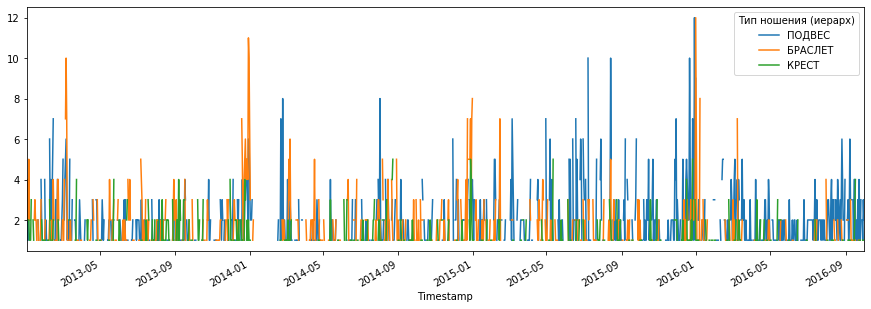

In [0]:
qty_ts[['ПОДВЕС', 'БРАСЛЕТ', 'КРЕСТ']].loc['2013-01-02':'2016-10-01'].plot(figsize=(15,5))

In [0]:
agg_column = 'Ценовой сегмент (иерарх)'
ts_data = data.reset_index().reset_index().groupby(['Timestamp',agg_column]).agg({'quantity' : np.sum,
        'price' : np.mean,
        'price_after_discount' :[np.min, np.max, np.mean]})
qty_ts = ts_data['quantity'].rename(columns={'sum':'quantity'}).reset_index().pivot(index = 'Timestamp', 
                                                                            columns =agg_column, values = 'quantity')
qty_ts.head()

Ценовой сегмент (иерарх),(Не определен),ДЕШЕВАЯ,ДОРОГАЯ,СРЕДНЯЯ
Timestamp,,,,
2013-01-02,NaN,3.0,NaN,5.0
2013-01-03,NaN,8.0,9.0,7.0
2013-01-04,NaN,2.0,6.0,10.0
2013-01-05,NaN,7.0,5.0,6.0
2013-01-06,NaN,5.0,6.0,5.0


In [0]:
qty_ts.sum(axis=0).head()

Ценовой сегмент (иерарх)
(Не определен)    2945.0
ДЕШЕВАЯ           4293.0
ДОРОГАЯ           4909.0
СРЕДНЯЯ           5706.0
dtype: float64

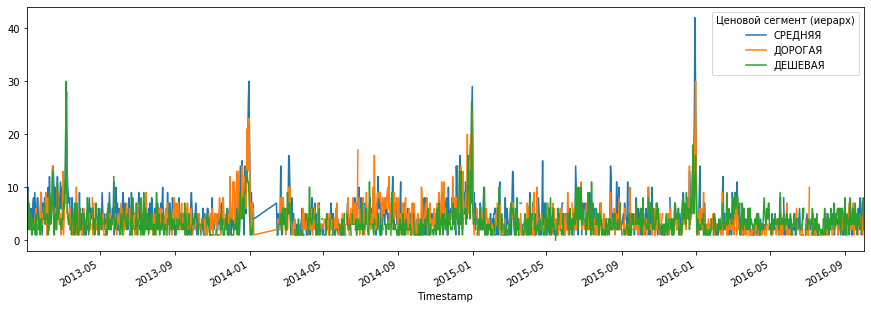

In [0]:
qty_ts[['СРЕДНЯЯ', 'ДОРОГАЯ','ДЕШЕВАЯ']].loc['2013-01-02':'2016-10-01'].plot(figsize=(15,5))

## Восстановление спроса

In [0]:
# Подгрузим инфо об остатках (inventory)
inventory = pd.read_csv('/content/gdrive/My Drive/A Reinforcement Learning Approach for Inventory Optimization in Retail/DemandRestoring_v0/data/remains_4001.csv', sep=',', decimal='.')
inventory['Timestamp'] = pd.to_datetime(inventory[u'updated_at'])
inventory = inventory.set_index(['Timestamp'], drop=True)
inventory.head()

,shop_id,product_id,updated_at,quantity
Timestamp,,,,
2015-08-31,4001,4300059161,2015-08-31,0
2016-01-02,4001,4300059161,2016-01-02,0
2015-08-31,4001,4300059161,2015-08-31,1
2013-04-17,4001,4300051009,2013-04-17,1
2013-08-11,4001,4300051009,2013-08-11,0


## Пример расчёта интенсивности спроса lambda на одной паре Product|Location

In [0]:
product_id = 4900001067
shop_id=4001
inventory[(inventory['product_id']==product_id)&(inventory['shop_id']==shop_id)]

,shop_id,product_id,updated_at,quantity
Timestamp,,,,
2015-12-12,4001,4900001067,2015-12-12,5
2015-09-03,4001,4900001067,2015-09-03,0
2015-08-31,4001,4900001067,2015-08-31,33
2016-06-05,4001,4900001067,2016-06-05,0


In [0]:
# Агрегируем на всякий случай остатки на одну дату (берём максимально известный остаток за дату)
iv_ts = inventory.reset_index().groupby('Timestamp').agg({'quantity' : np.max}).rename(columns={'quantity':'inventory'})
iv_ts.head()

,inventory
Timestamp,
2013-01-02,0
2013-01-03,0
2013-01-04,0
2013-01-05,0
2013-01-06,0


In [0]:
# дополним пропущенные значения (т.е. добавим пропущенные даты в DF и заполним значения остатков в эти даты нулями)
iv_ts= iv_ts.reindex(pd.date_range(np.min(iv_ts.index), np.max(iv_ts.index))).fillna(method = 'ffill')
iv_ts.head()

,inventory
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0
2013-01-06,0.0


In [0]:
# Добавим данные о продажах
sales_ts = data[(data['product_id']==product_id)&(data['shop_id']==shop_id)].rename(columns={'quantity':'sales'})

In [0]:
# смёржим продажи и остатки
iv_sales=sales_ts[['sales']].merge(iv_ts, how='right', left_index=True, right_index = True)
iv_sales['sales'].fillna(0, inplace=True)
iv_sales.head()

,sales,inventory
2013-01-02,0.0,0.0
2013-01-03,0.0,0.0
2013-01-04,0.0,0.0
2013-01-05,0.0,0.0
2013-01-06,0.0,0.0


In [0]:
# для более консервативной оценки удалим начало истории и "хвост" истории, когда и продажи, и остатки были равны нулю
positive_iv_sales = iv_sales[iv_sales.max(axis=1)>0]
life_start_date = positive_iv_sales.index[0]
life_end_date = positive_iv_sales.index[-1]

iv_sales = iv_sales[(iv_sales.index >= life_start_date)&(iv_sales.index <= life_end_date )] 
iv_sales.head()

,sales,inventory
2013-01-11,0.0,2.0
2013-01-12,0.0,0.0
2013-01-13,0.0,0.0
2013-01-14,0.0,0.0
2013-01-15,5.0,0.0


In [0]:
# даты, когда и остатки, и продажи равны нулю
zero_idx = (iv_sales['inventory']==0) & (iv_sales['sales']==0)

# даты, когда продажи равны остаткам
s_eq_i_idx = (iv_sales['inventory']==iv_sales['sales']) 

# даты, когда продажи больше или равны остаткам
s_gr_i_idx = (iv_sales['inventory']<=iv_sales['sales'])  

In [0]:
# даты, когда был дефицит (out-of-stock)
oos_idx = zero_idx # подход к определнию момента дефицита может быть другим
# oos_idx = s_gr_i_idx # более мягкий вариант (больше где восстановим спрос)
iv_sales[(oos_idx)].head()

,sales,inventory
2013-01-12,0.0,0.0
2013-01-13,0.0,0.0
2013-01-14,0.0,0.0
2013-01-18,0.0,0.0
2013-01-20,0.0,0.0


In [0]:
sum_k = iv_sales['sales'].sum()
n_k_less_m = iv_sales['sales'][(~zero_idx) & (~s_gr_i_idx)].count() # кол-во дней, когда весь остаток был распродан
n_k_equal_m = iv_sales['sales'][(~zero_idx) & s_gr_i_idx].count() # кол-во дней, когда продажи строго меньше остатка


print('sum_k: ', sum_k) # Суммарные продажи
print('n_0: ', n_k_less_m) # число дней, когда 
print('n_m: ', n_k_equal_m)

sum_k:  337.0
n_0:  161
n_m:  301


In [0]:
alpha=1
LAMBDA = sum_k/(n_k_less_m+alpha*n_k_equal_m)

print('LAMBDA:', LAMBDA)
print('MEAN:', iv_sales['sales'][~oos_idx].mean())

LAMBDA: 0.7294372294372294
MEAN: 0.7294372294372294


In [0]:
iv_sales['sales'][oos_idx].count()

929

In [0]:
# Кейс: сколько было потеряно спроса за весь период
print('Суммарно за весь период с ', np.min(iv_sales.index), ' по ', np.max(iv_sales.index))
print('COVERED DEMAND: ', sum_k)
print('LOST DEMAND: ', LAMBDA*iv_sales['sales'][oos_idx].count())
print('LOST DEMAND: ', LAMBDA*iv_sales['sales'][oos_idx].count() / sum_k*100, '%')

Суммарно за весь период с  2013-01-11 00:00:00  по  2016-10-15 00:00:00
COVERED DEMAND:  337.0
LOST DEMAND:  677.6471861471862
LOST DEMAND:  201.0822510822511 %


## Восстановленный спрос для всех товаров

In [0]:
# TODO: реализовать функцию для расчёт величины восстановленного спроса и суммарного спроса (продажи+восстановленный спрос)
# Вариант с alpha=1
alpha=1
lambda_values = pd.DataFrame(index = data['product_id'].unique(), columns = ['LAMBDA','sum_k', 'n_k_less_m', 'n_k_eq_m'])
lambda_values.head()

In [0]:
data['product_id'].unique()

In [0]:
product_ids = inventory.product_id
inventory[(inventory['product_id'] == product_ids) & (inventory['shop_id'] == 4001)]

In [0]:
# Агрегируем на всякий случай остатки на одну дату (берём максимально известный остаток за дату)
iv_ts = inventory.reset_index().groupby(['product_id', 'Timestamp']).agg({'quantity' : np.max}).rename(columns={'quantity':'inventory'})
iv_ts

In [0]:
iv_ts[21475:21480]

In [0]:
inventory['2015-08-31']

In [0]:
# Добавим данные о продажах
sales_ts = data[(data['product_id'].isin(data['product_id'].unique()))].rename(columns={'quantity':'sales'})
sales_ts.head()

In [0]:
sales_ts.groupby(['product_id']).sales.sum()

In [0]:
sales_ts.groupby(['product_id']).sales.sum()[product_ids[0]]

In [0]:
lambda_values.sum_k[data['product_id'].unique()] = sales_ts.groupby(['product_id']).sales.sum()[data['product_id'].unique()]

In [0]:
lambda_values

In [0]:
iv_sales = data['product_id'].copy()
iv_sales

In [0]:
# смёржим продажи и остатки
iv_sales = sales_ts[['sales']].merge(iv_ts, how='right', left_index=True, right_index = True)
iv_sales['sales'].fillna(0, inplace=True)
iv_sales.head()

In [0]:
# для более консервативной оценки удалим начало истории и "хвост" истории, когда и продажи, и остатки были равны нулю
positive_iv_sales = iv_sales[iv_sales.max(axis=1)>0]
life_start_date = positive_iv_sales.index[0]
life_end_date = positive_iv_sales.index[-1]

iv_sales = iv_sales[(iv_sales.index >= life_start_date)&(iv_sales.index <= life_end_date )] 
iv_sales.head()

In [0]:
# даты, когда и остатки, и продажи равны нулю
zero_idx = (iv_sales['inventory']==0) & (iv_sales['sales']==0)

# даты, когда продажи равны остаткам
s_eq_i_idx = (iv_sales['inventory']==iv_sales['sales']) 

# даты, когда продажи больше или равны остаткам
s_gr_i_idx = (iv_sales['inventory']<=iv_sales['sales'])  

In [0]:
# даты, когда был дефицит (out-of-stock)
oos_idx = zero_idx # подход к определнию момента дефицита может быть другим
# oos_idx = s_gr_i_idx # более мягкий вариант (больше где восстановим спрос)
iv_sales[(oos_idx)].head()

In [0]:
sum_k = iv_sales['sales'].sum()
n_k_less_m = iv_sales['sales'][(~zero_idx) & (~s_gr_i_idx)].count() # кол-во дней, когда весь остаток был распродан
n_k_equal_m = iv_sales['sales'][(~zero_idx) & s_gr_i_idx].count() # кол-во дней, когда продажи строго меньше остатка


print('sum_k: ', sum_k) # Суммарные продажи
print('n_0: ', n_k_less_m) # число дней, когда 
print('n_m: ', n_k_equal_m)

In [0]:
alpha=1
LAMBDA = sum_k / (n_k_less_m + alpha * n_k_equal_m)

print('LAMBDA:', LAMBDA)
print('MEAN:', iv_sales['sales'][~oos_idx].mean())

In [0]:
# TODO: отобразить графики продаж и спроса (продаж+восстановленный спрос), сравнить объёмы расхождения

## Честный вариант восстановления спроса

In [0]:
# TODO: реализовать функцию для расчёт величины восстановленного спроса и суммарного спроса (продажи+восстановленный спрос)
# Вариант с alpha, определяемым согласно остаточному члену в разложении экспоненты в ряд Тейлора
alpha=%TODO
lambda_values = pd.DataFrame(index = data['product_id'].unique(), columns = ['LAMBDA','sum_k', 'n_k_less_m', 'n_k_eq_m'])

In [0]:
# TODO: отобразить графики продаж и спроса (продаж+восстановленный спрос)